In [1]:
/reg/d/psdm/cxi/cxilp6715/results/test_simulated_data/Gi-MBP_conf

/reg/d/psdm/cxi/cxilp6715/results/test_simulated_data/Gi-MBP_conf5_150ns/Gi-MBP_conf5_150ns_water_shell_5A_91_downsamp_q0.18_0.90_Nq35.hdf5


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py


import matplotlib as mpl
mpl.rcParams['font.serif'] = "Bitstream Vera Serif"
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['font.size'] = 18

from matplotlib.gridspec import GridSpec

In [21]:
def normalize_set(d):
    x=d.copy()
    x-=x.min(-1)[:,None]
    return x/(x.max(-1)[:,None])

In [3]:
f_open = h5py.File('/reg/d/psdm/cxi/cxilp6715/results/test_simulated_data/Gi-MBP_conf6_150ns_water_shell_5A_152_downsamp_q0.18_0.90_Nq35.hdf5','r')
f_close = h5py.File('/reg/d/psdm/cxi/cxilp6715/results/test_simulated_data/Gi-MBP_conf5_150ns/Gi-MBP_conf5_150ns_water_shell_5A_91_downsamp_q0.18_0.90_Nq35.hdf5','r')

In [29]:
print f_open.keys()
f_open['downsamp_corrs']
f_open['q_intervals']

[u'cors', u'downsamp_corrs', u'q_intervals', u'wavlen_in_angstrom']


<HDF5 dataset "q_intervals": shape (36, 2), type "<f8">

In [41]:
phi_offset =15
qs = f_open['q_intervals'][:,0]
open_cor=normalize_set(f_open['downsamp_corrs'][:,phi_offset:354/2-phi_offset])
close_cor=normalize_set(f_close['downsamp_corrs'][:,phi_offset:354/2-phi_offset])
phis = np.linspace(0,180, 354)[phi_offset:354/2-phi_offset]

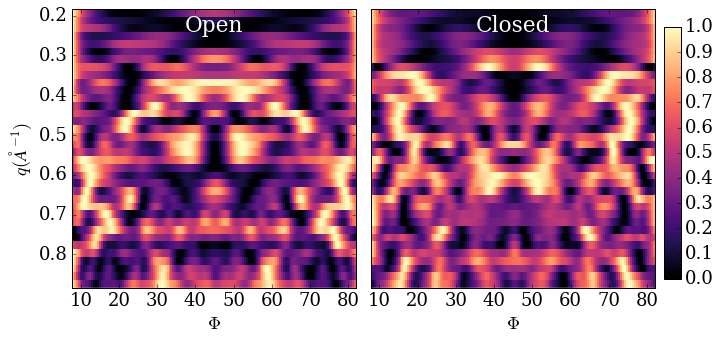

In [96]:
fig=plt.figure(figsize=[12,5])
gs = GridSpec(1,2)
gs.update(wspace=0.05)
ax = plt.subplot(gs[0,0])
im = plt.imshow(open_cor,aspect='auto',
           extent=[phis.min(),phis.max(),qs.max(),qs.min()],
           interpolation='None',
           vmin=0,vmax = 1,
          cmap='magma')
plt.xlabel('$\Phi$')
fig.subplots_adjust(right=0.8)
plt.ylabel('$q (\AA^{-1})$')

ax.set_title('Open'
             , x= 0.5,y =0.9, color='White')
# cbar_ax = fig.add_axes([0.05, 0.15, 0.02, 0.7])
# fig.colorbar(im, cax=cbar_ax)
# cbar_ax.yaxis.set_ticks_position('left')

ax = plt.subplot(gs[0,1])
im=plt.imshow(close_cor,aspect='auto',
           extent=[phis.min(),phis.max(),qs.max(),qs.min()],
           interpolation='None',
           vmin=0,vmax = 1,
          cmap='magma')
plt.xlabel('$\Phi$')
plt.yticks([])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

cbar_ax.yaxis.set_ticks_position('right')
ax.set_title('Closed'
             , x= 0.5,y =0.9, color='White')
# plt.savefig('polar_imgs_calibrated.png')
plt.savefig('open_close_simulated_cor.png',bbox_in_inches='tight')



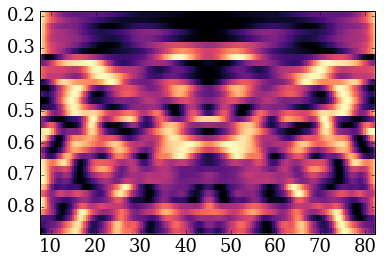

In [46]:
plt.imshow(close_cor,aspect='auto',
           extent=[phis.min(),phis.max(),qs.max(),qs.min()],
           interpolation='None',
           vmin=0,vmax = 1,
          cmap='magma')

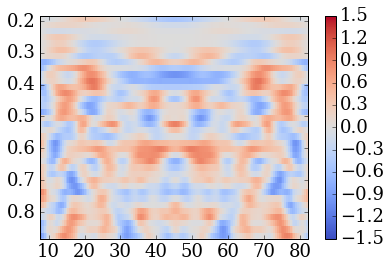

In [58]:
plt.imshow(close_cor-open_cor,aspect='auto',
           extent=[phis.min(),phis.max(),qs.max(),qs.min()],
           interpolation='None',
           vmin=-1.5,vmax = 1.5,
          cmap='coolwarm')
plt.colorbar()